# Single predictor models
Single predictor models investigating the effect of a range of lower- and higher-level visual and auditory predictors.

In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
from tools.create import create_single_models
from tools.base import (dump_collection, load_collection, 
                        flatten_collection, compute_metrics,
                        _extract_regressors)
from tools.viz import (plot_regressor,
                       plot_metrics, plot_contrast_by_dataset, plot_contrast_by_analysis,
                       plot_analysis_grid)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
%matplotlib inline

In [6]:
api = Neuroscout()

## Define predictors and confounds

In [42]:
predictors = ['speech', 'rms', 'text',
              'brightness', 'shot_change', 
              'any_faces', 
              'hand', 'action', 'landscape', 'building', 'indoors', 'city', 
              'animal', 'music', 'vehicle', 'water', 'wood', 'tool']

new_p = ['animal', 'music', 'vehicle', 'water', 'wood', 'tool']


In [43]:
confounds = ['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']

## Create models

In [9]:
# single_models = create_single_models(predictors, confounds)

In [10]:
filename = Path('models') / 'single_predictor.json'

In [87]:
# dump_collection(single_models, filename)

In [12]:
single_models = load_collection(filename)

## Generate reports

In [52]:
for (pred, dataset, task), model in flatten_collection(single_models):
    model.generate_report(run_id=model.runs[0])

In [ ]:
for p in predictors:
    single_models[p]['Raiders']['raiders'].plot_report()

## Inspect regressors

In [155]:
# df = _extract_regressors(single_models)

In [ ]:
plot_regressor_distribution(df=df, split_by='hue', color=None, aspect=3, hist=None, rug=True)

In [ ]:
plot_regressor_timeseries(df=df, split_by='row', height=1.2, aspect=10)

In [ ]:
agg_df = compute_metrics(df=df, aggfunc=[np.mean, np.std, np.var])

In [ ]:
plot_metrics(agg_df, metrics=['mean', 'std', 'var'],
             sns_function='barplot', height=3, aspect=1)

## Compile models

In [91]:
from tools.viz import find_image

In [148]:
for (pred, dataset, task), model in flatten_collection(single_models):
    if model.get_status()['status'] != 'PASSED':
        model.compile(build=False)

## Results

In [151]:
flat_models = flatten_collection(single_models)

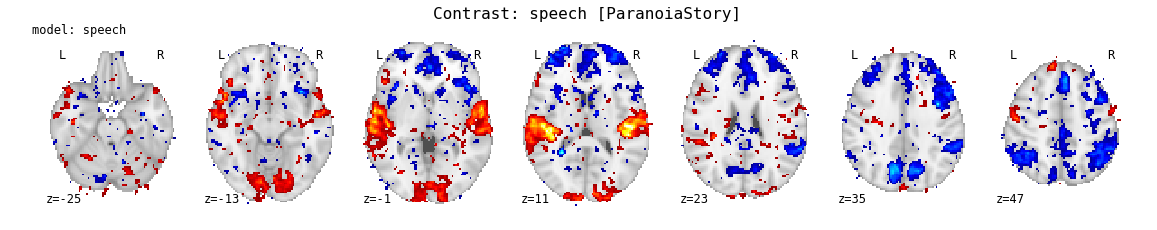

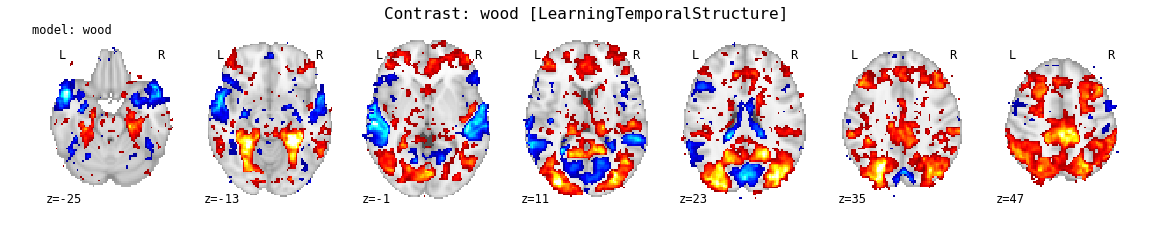

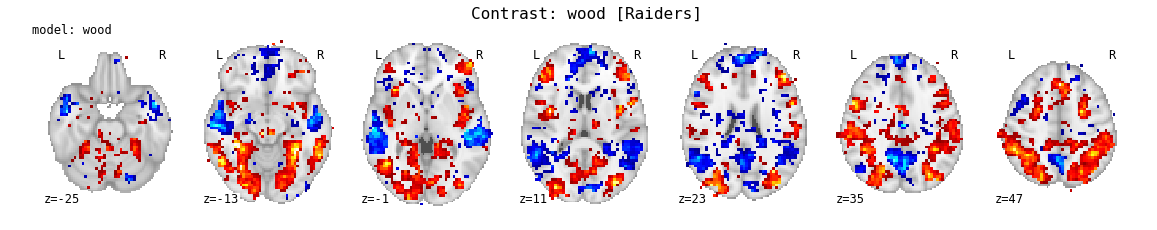

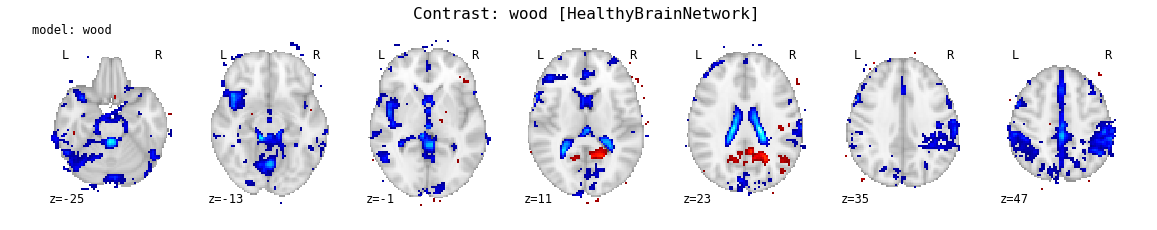

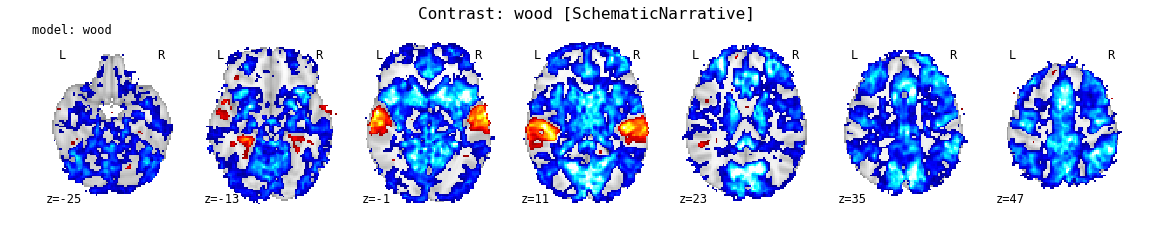

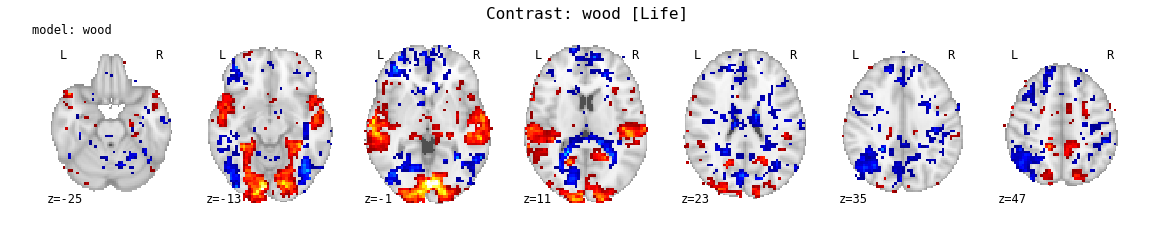

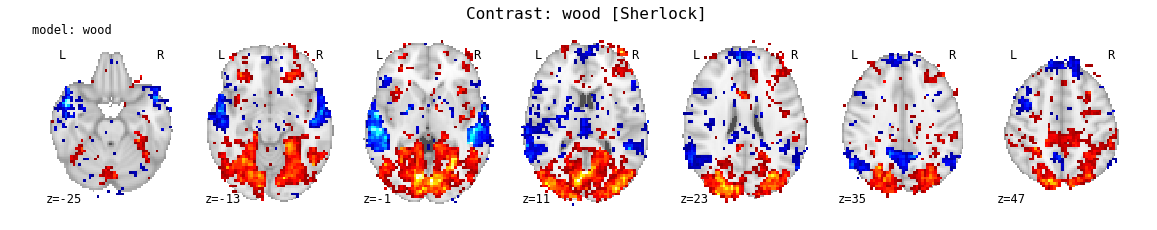

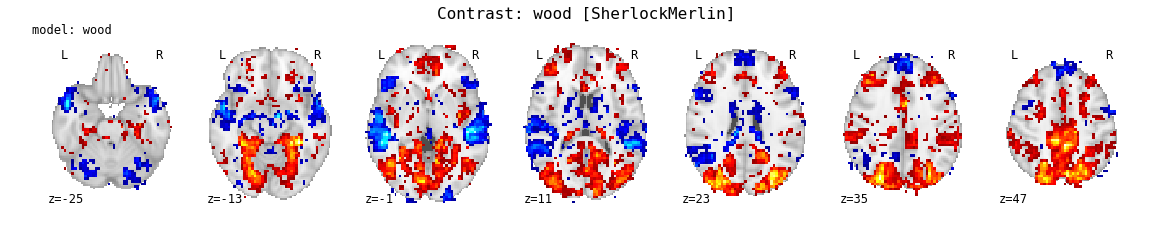

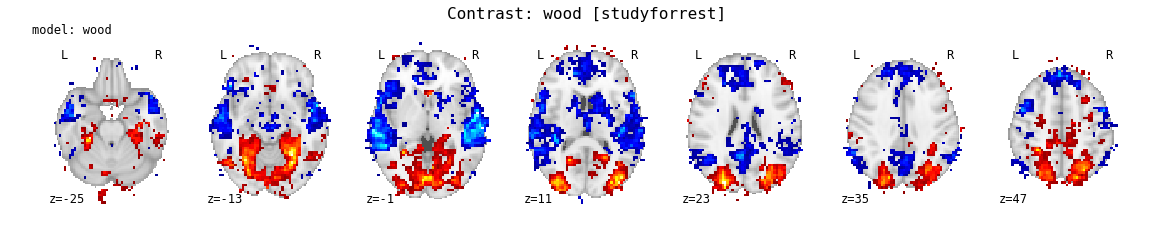

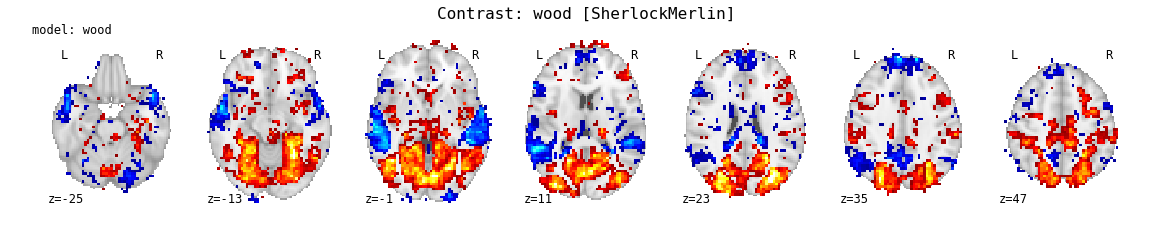

In [152]:
plt.rcParams.update({'font.family': 'monospace'})
plot_contrast_by_dataset(flat_models,
                         vmax=10, display_mode='z', figsize=(12,15),
                         threshold=1.96, colorbar=False)

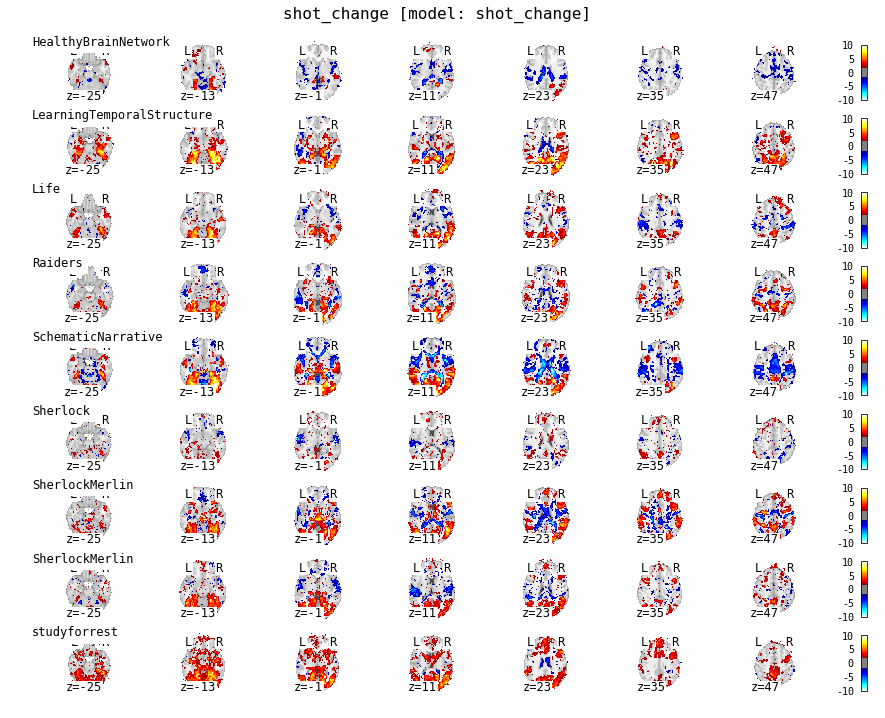

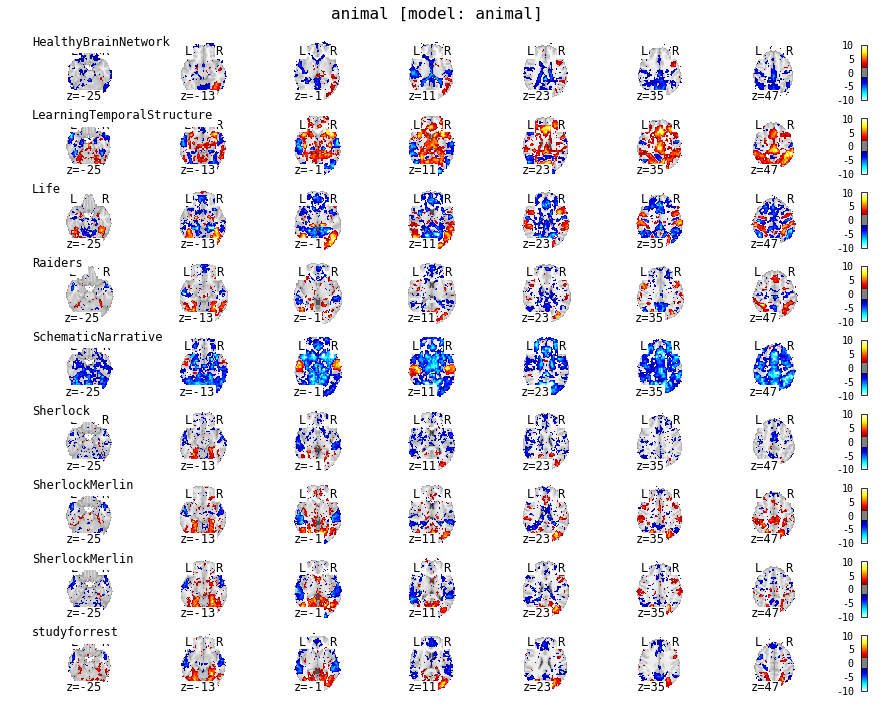

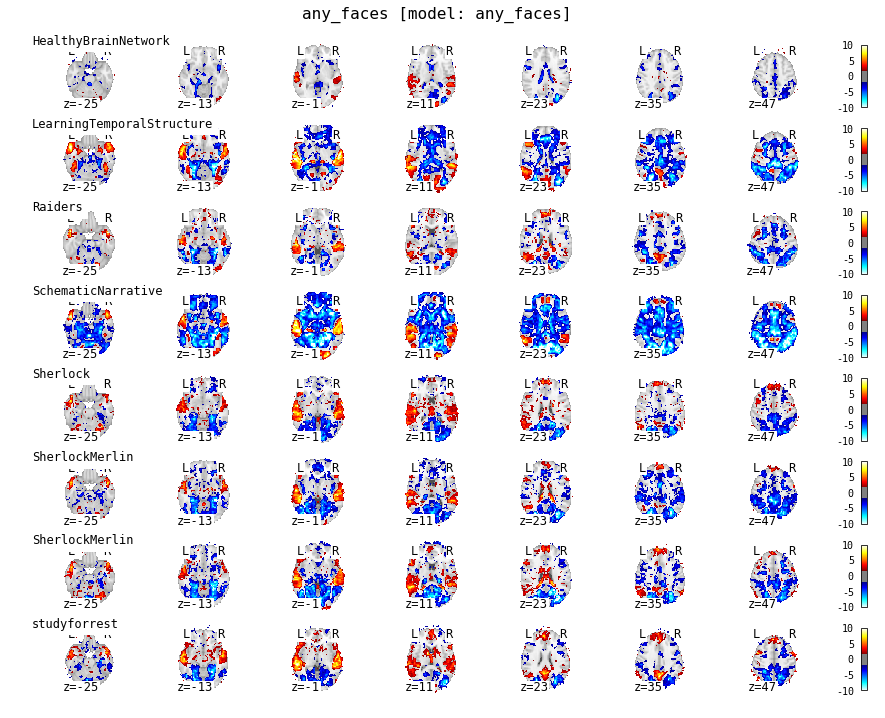

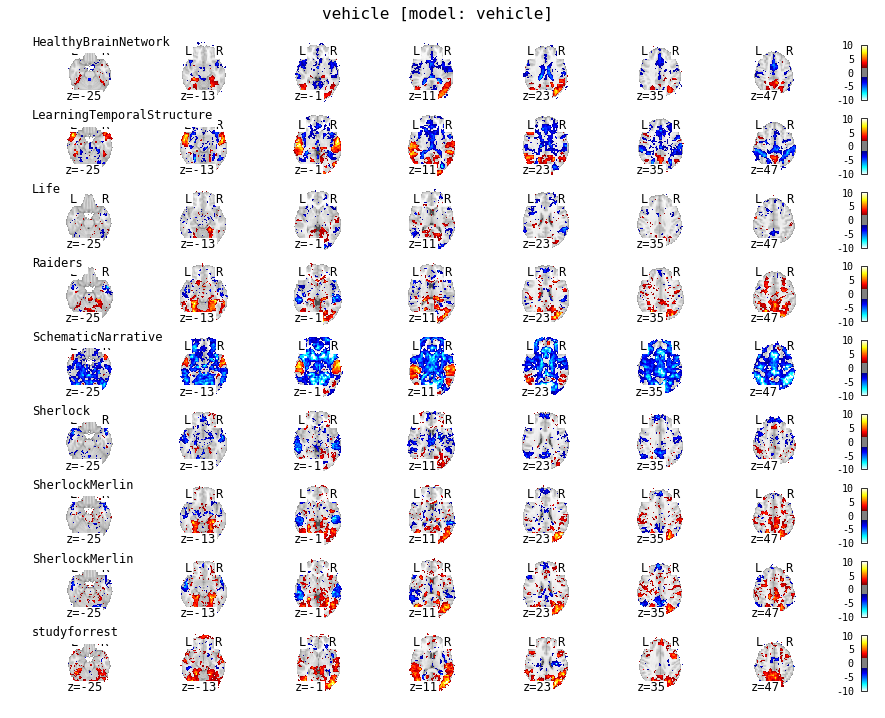

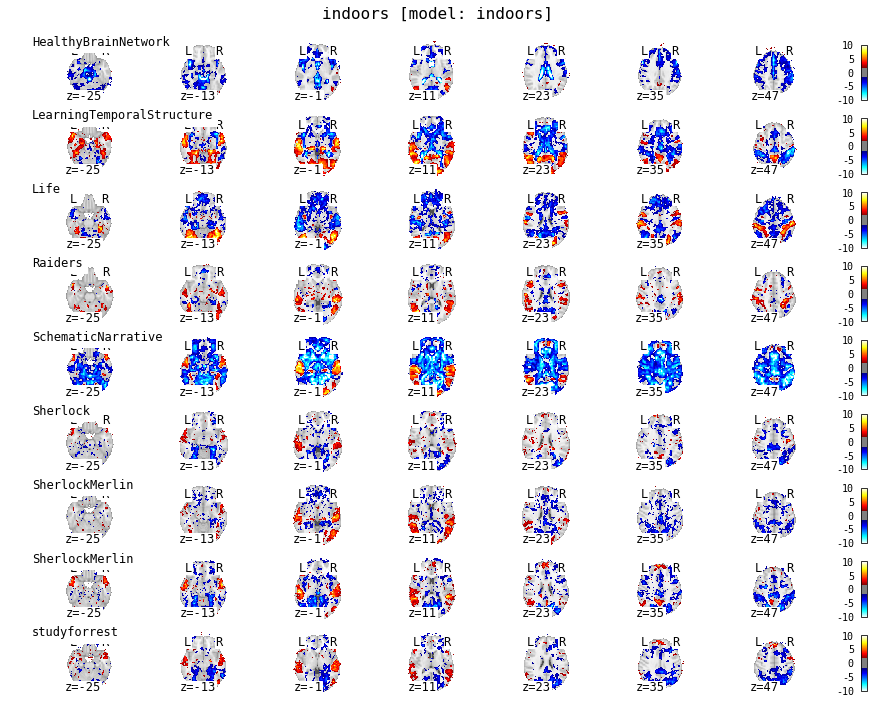

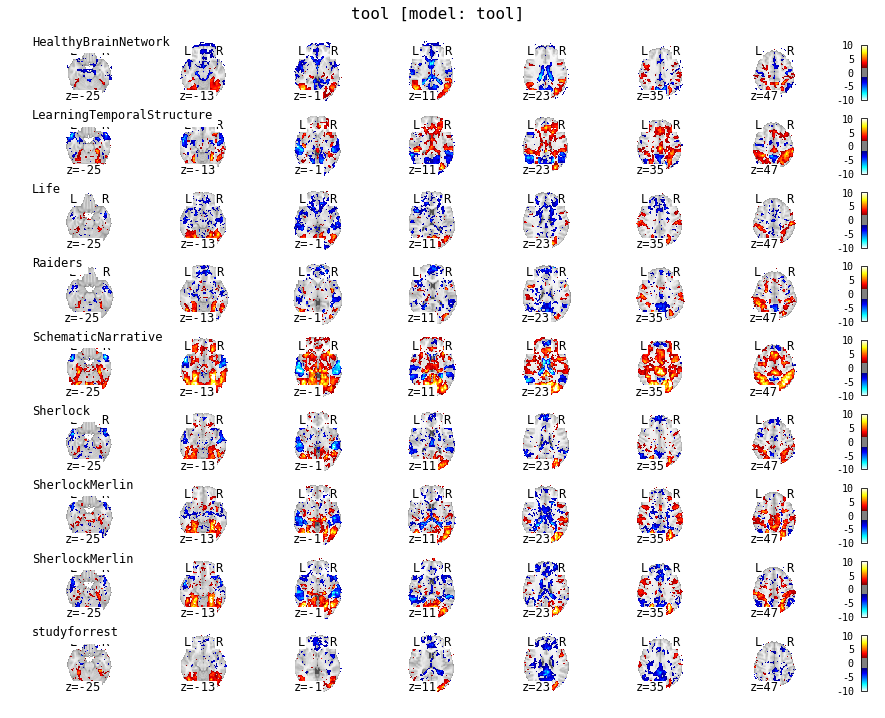

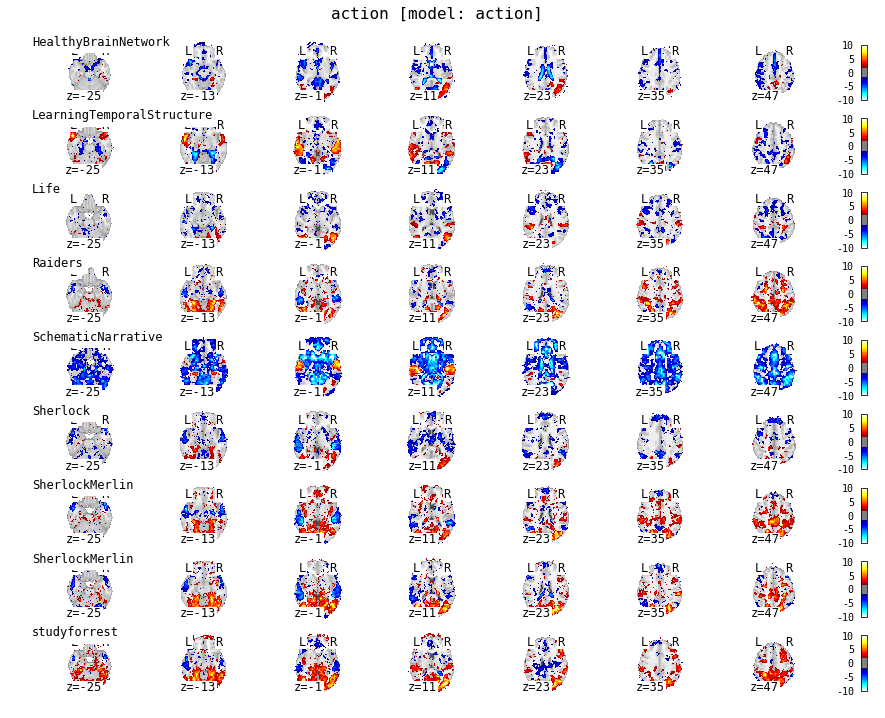

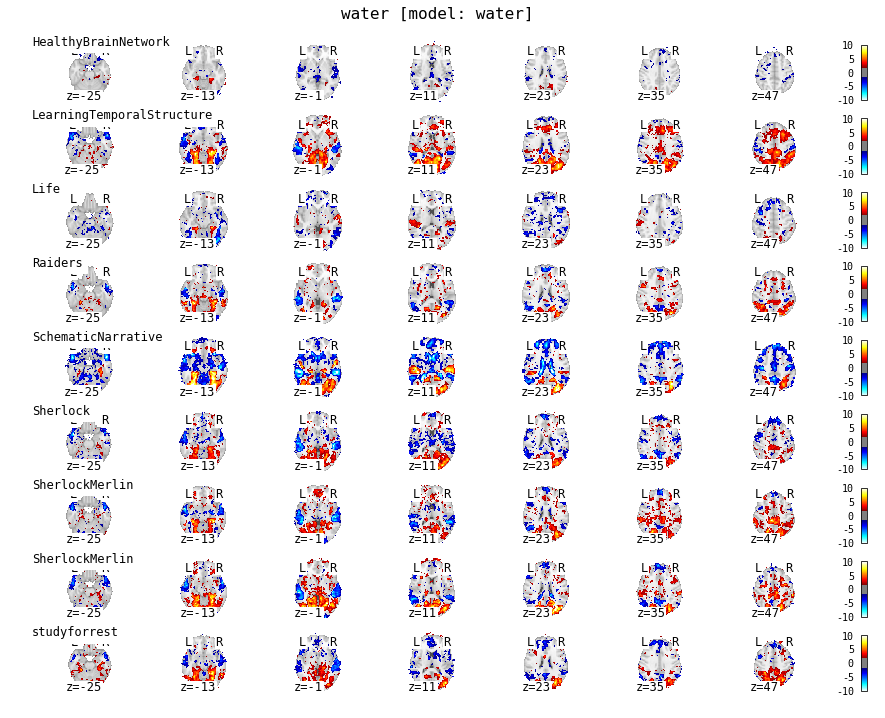

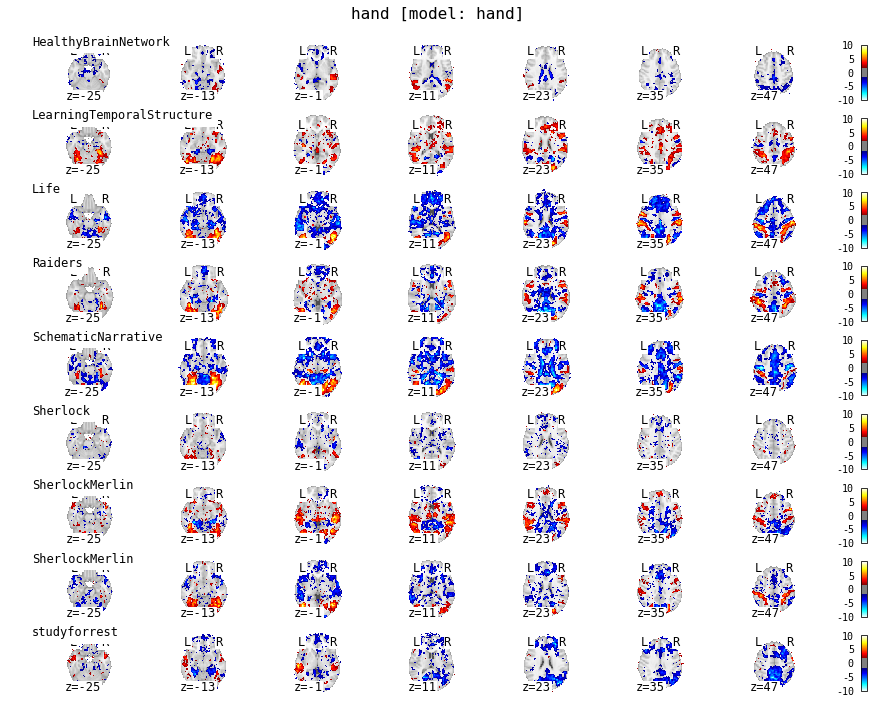

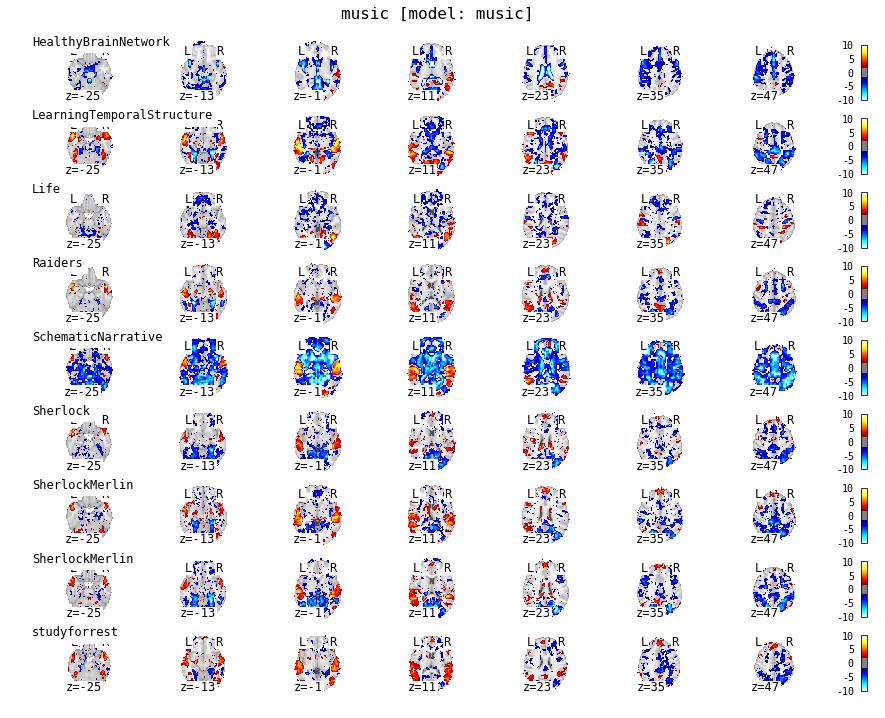

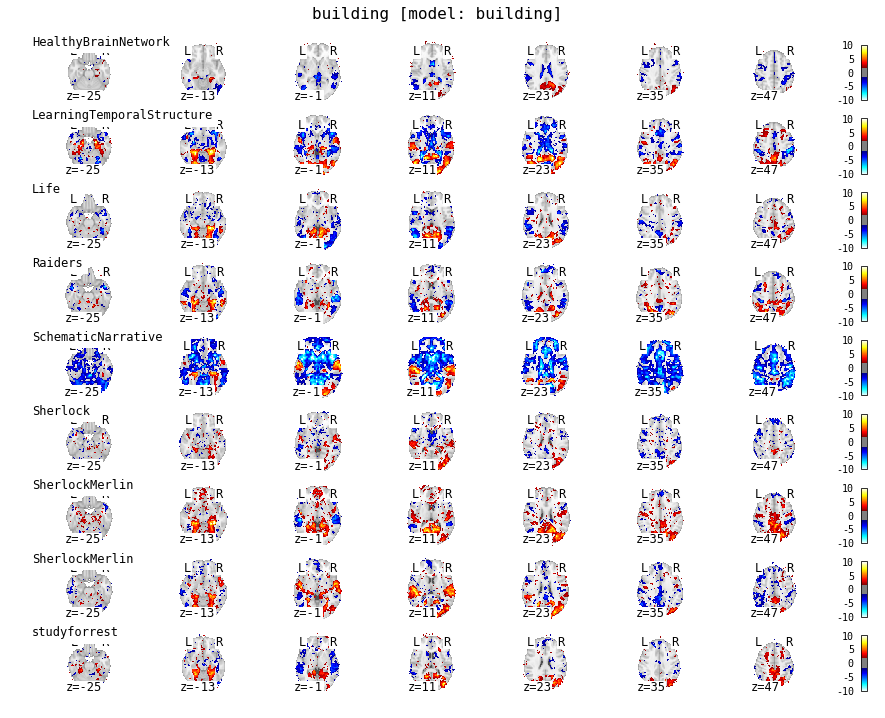

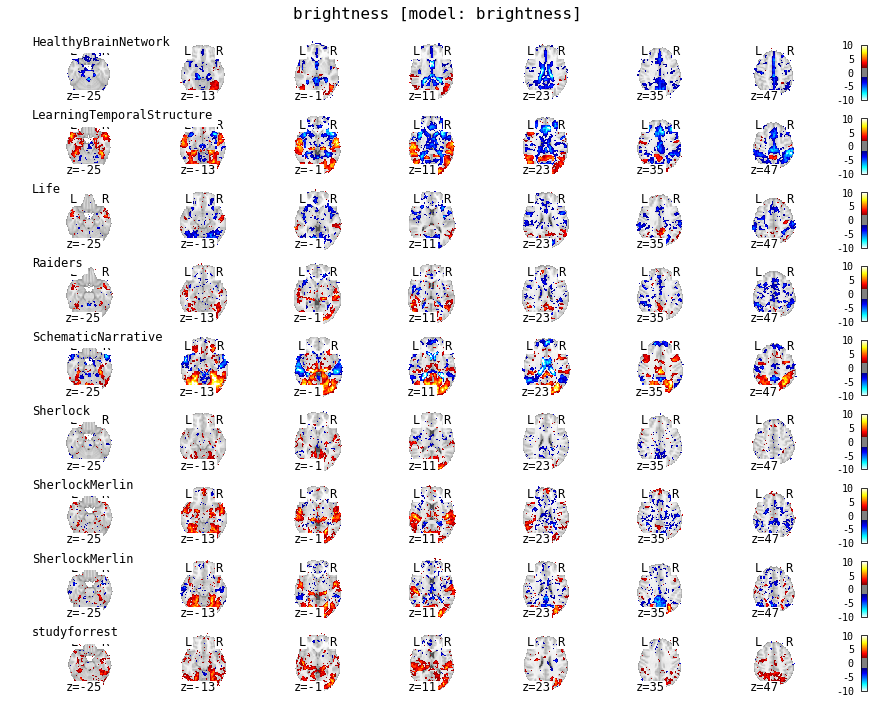

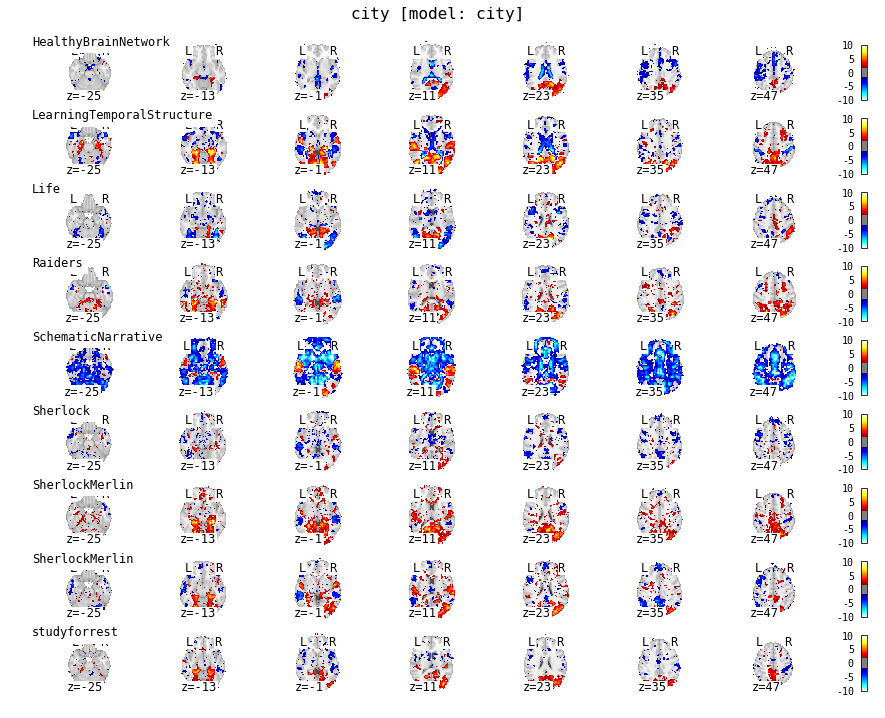

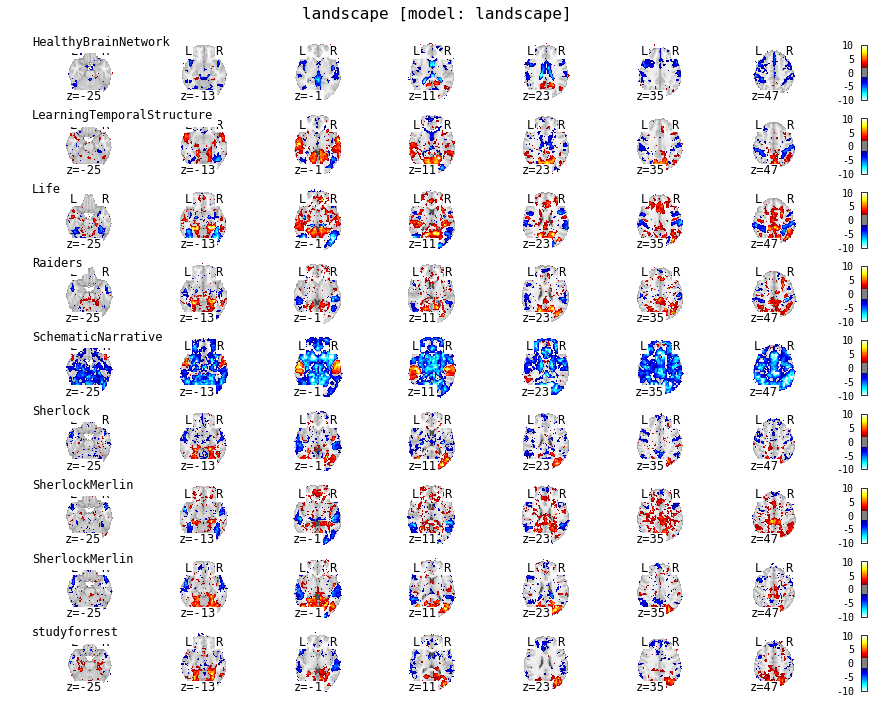

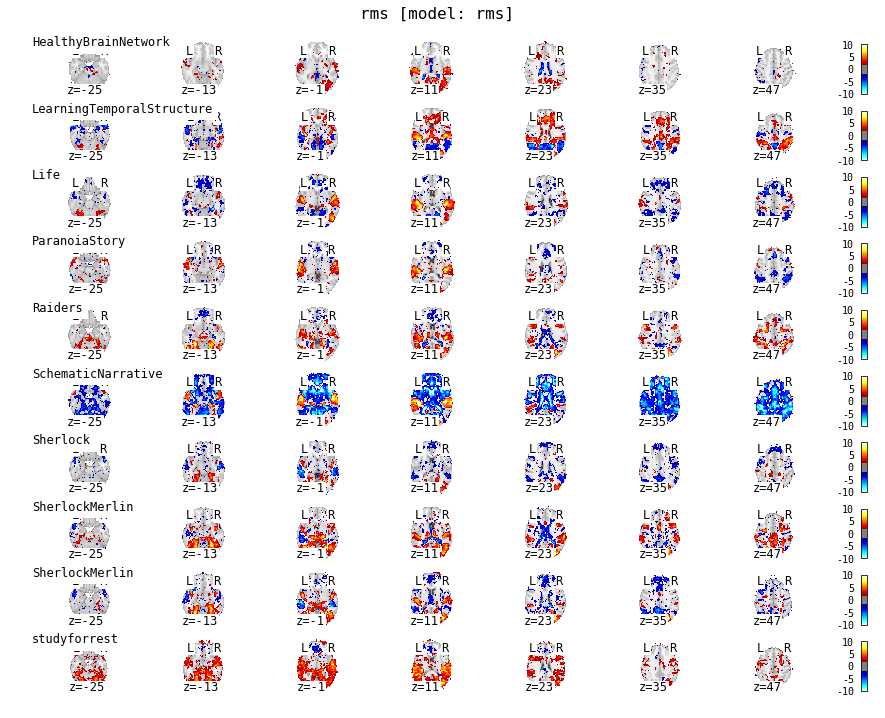

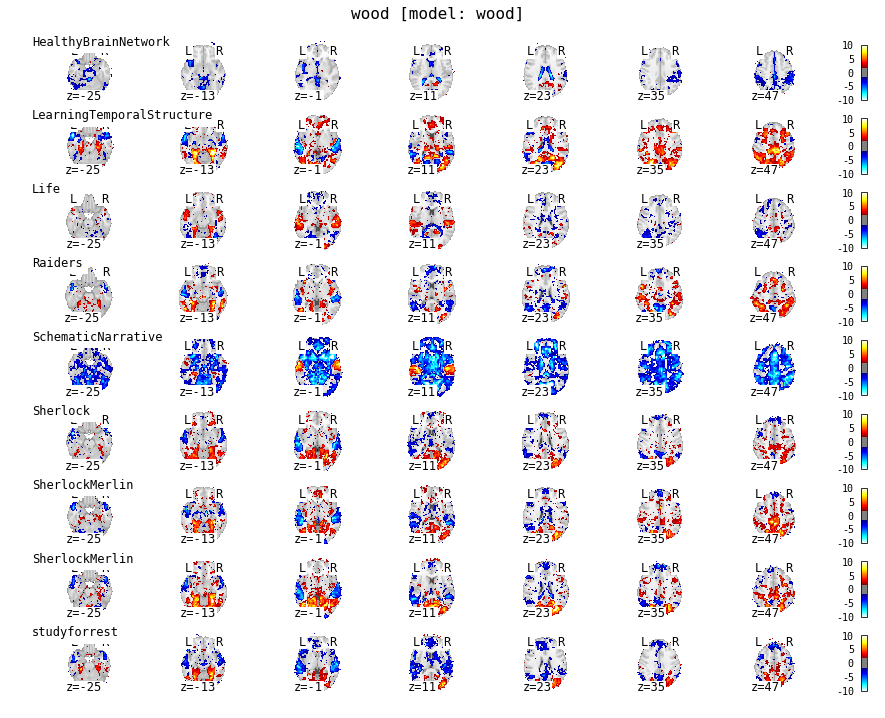

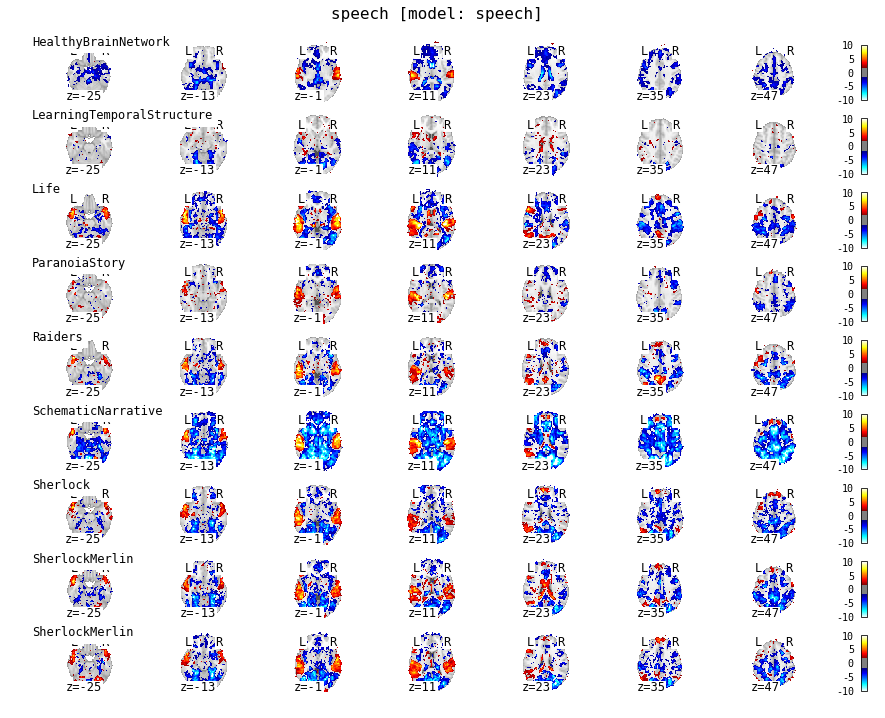

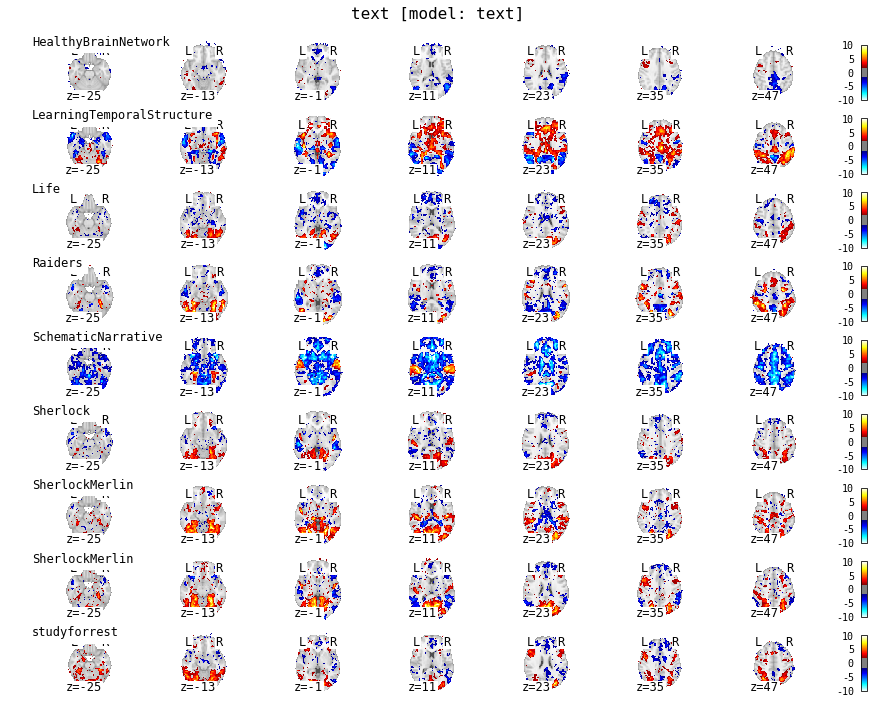

In [153]:
plot_contrast_by_analysis(flat_models,
                          vmax=10, draw_cross=True, 
                          figsize=(15,12), colorbar=True, threshold=1.96)